In [5]:
import sys
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

sys.path.append("../")
from Utils.Get_mvas import get_mvas_single_param, get_mvas_combined_params, get_events
from Utils.Combine_datasets import combine_mvas_adni


In [7]:
from matplotlib.font_manager import FontProperties

font_path = '../Old_Standard_TT'
font_path_regular = f'{font_path}/OldStandardTT-Regular.ttf'
font_path_bold = f'{font_path}/OldStandardTT-Bold.ttf'
font_path_italic = f'{font_path}/OldStandardTT-Italic.ttf'

# font_path_regular = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Regular.ttf'
# font_path_bold = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Bold.ttf'
# font_path_italic = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Italic.ttf'
# # Create a FontProperties object with the full path to the font file
prop_regular = FontProperties(fname=font_path_regular)
prop_bold = FontProperties(fname=font_path_bold)
prop_italic = FontProperties(fname=font_path_italic)

my_colors = ['#B0DAFF', '#FFB085']

def hex_to_rbg(hex_color):
    h = hex_color.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))


In [21]:
merge, df_event, apoe4_merge = get_mvas_combined_params()
print(merge.shape)
print(apoe4_merge.shape)
diff = set(merge.columns).symmetric_difference(set(apoe4_merge.columns))
# print(diff)
tmp = pd.concat([merge, apoe4_merge], axis=0)
# print(tmp.shape)

(128, 98)
(61, 92)


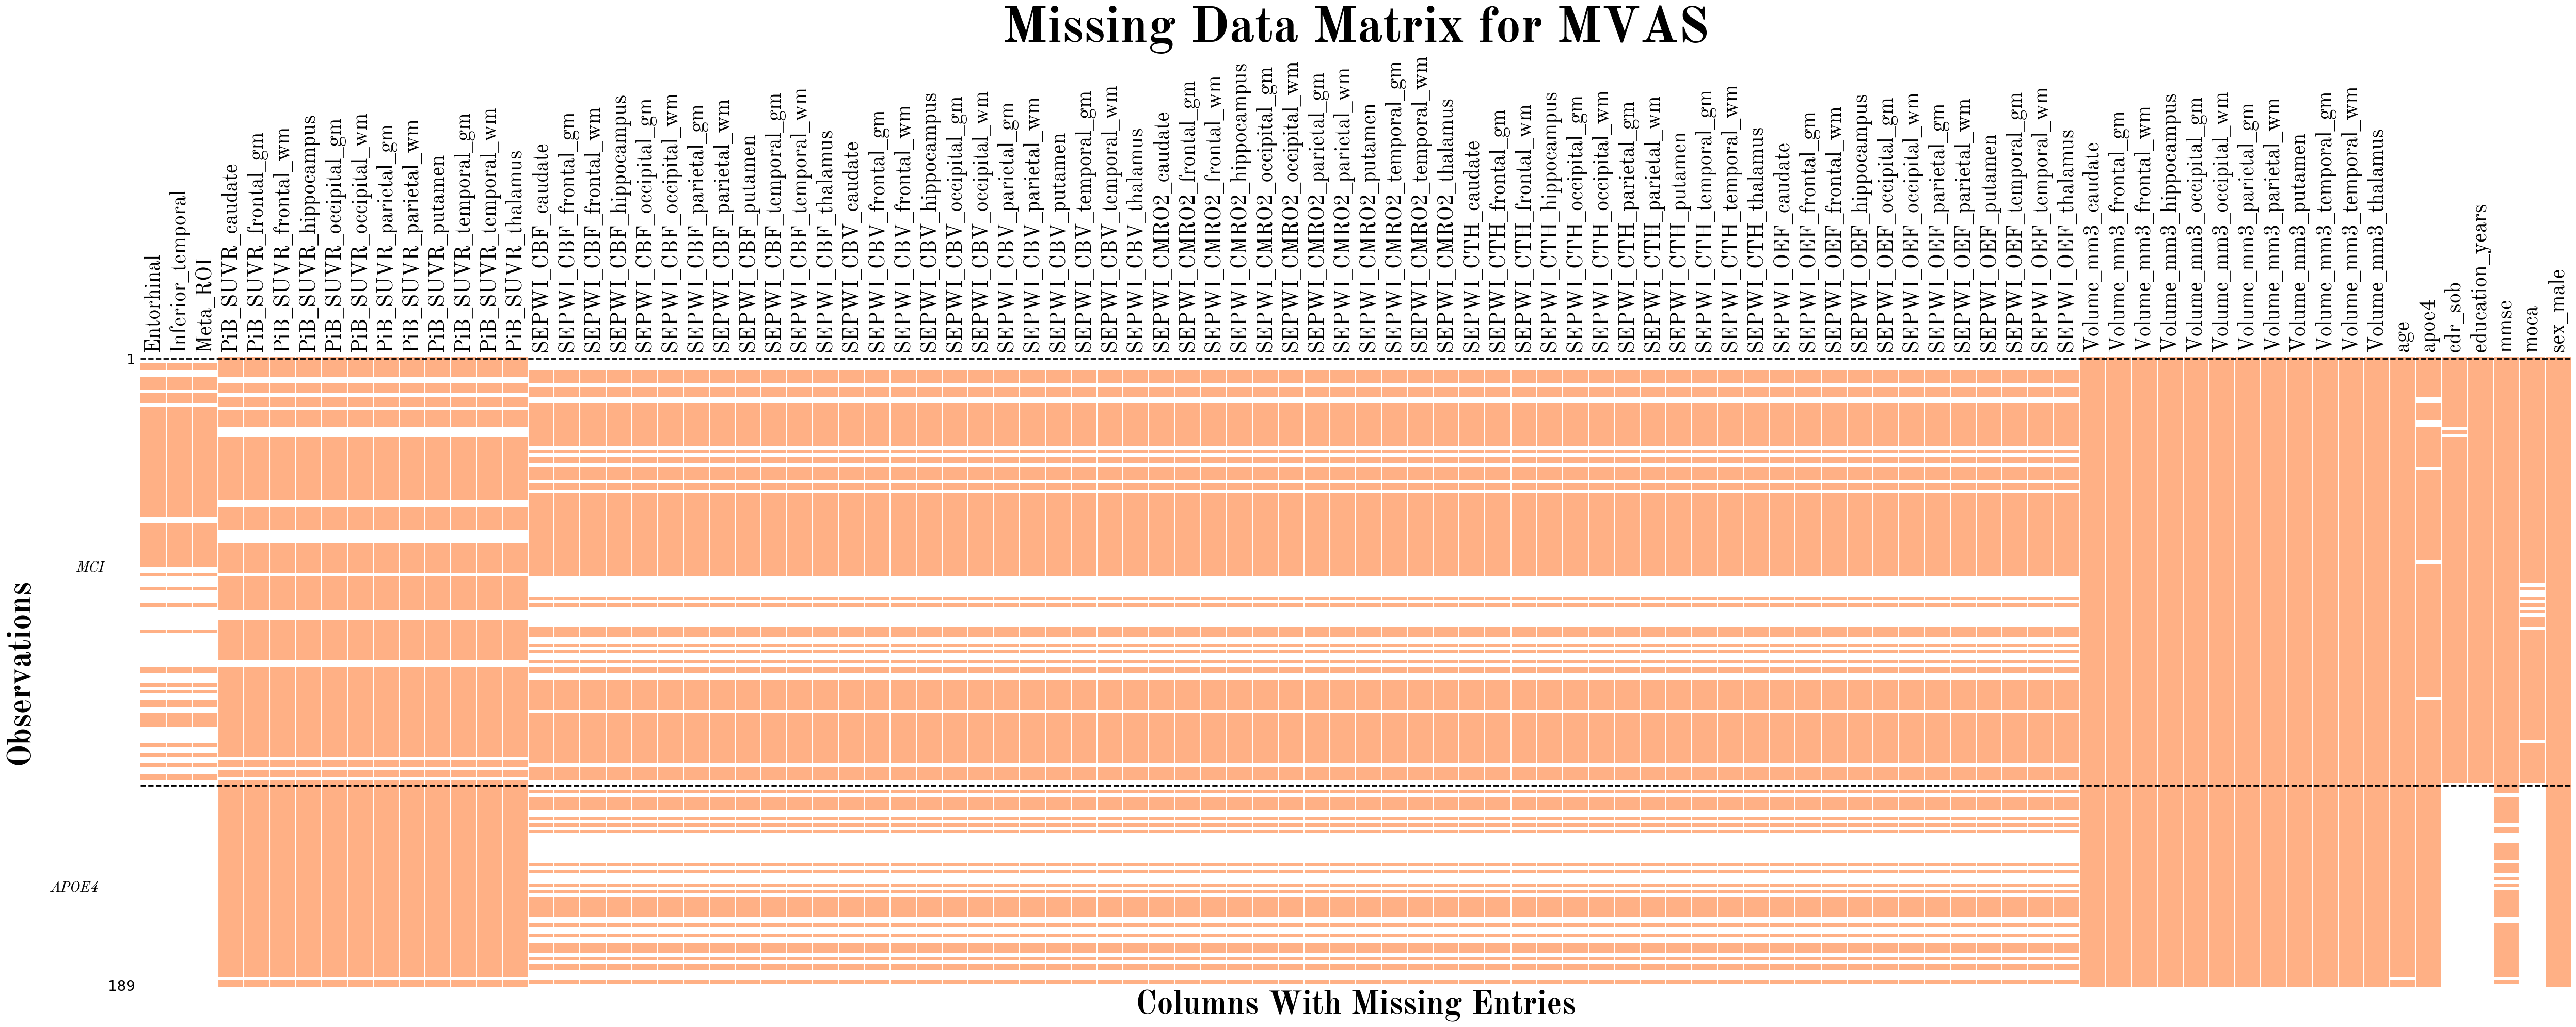

In [26]:
tmp = tmp.sort_values(['COLPROT'])
irrelevant_columns = ['M', 'RID','DX', 'COLPROT']
# columns = tmp.columns[merge.isnull().mean() < 0.1].drop('COLPROT')

merge_na = tmp.drop(irrelevant_columns, axis=1)
#Sort merge_na columns alphabetically
merge_na = merge_na.reindex(sorted(merge_na.columns), axis=1)

msno.matrix(merge_na, sparkline=False, color=hex_to_rbg(my_colors[1]), labels=True, figsize=(50, 20))
plt.title('Missing Data Matrix for MVAS', fontproperties=prop_bold, fontsize=70)
plt.xlabel('Columns With Missing Entries', fontproperties=prop_bold, fontsize=45)
plt.ylabel('Observations', fontproperties=prop_bold, fontsize=45, labelpad=100)
plt.xticks(rotation=90, fontproperties=prop_regular, fontsize=30, horizontalalignment='center')
plt.yticks([], minor=True)


plt.axhline(y=0, color='black', linestyle='--', linewidth=2)  # Draw a line at the change of cohorts
plt.axhline(y=128, color='black', linestyle='--', linewidth=2)  # Draw a line at the change of cohorts
plt.text(x=-3, y=64, s='MCI', fontproperties=prop_italic, fontsize=20, color='black')
plt.text(x=-4, y=160, s='APOE4', fontproperties=prop_italic, fontsize=20, color='black')


plt.tight_layout()
plt.savefig("figures/missing_data_matrix_MVAS.png")
plt.show()


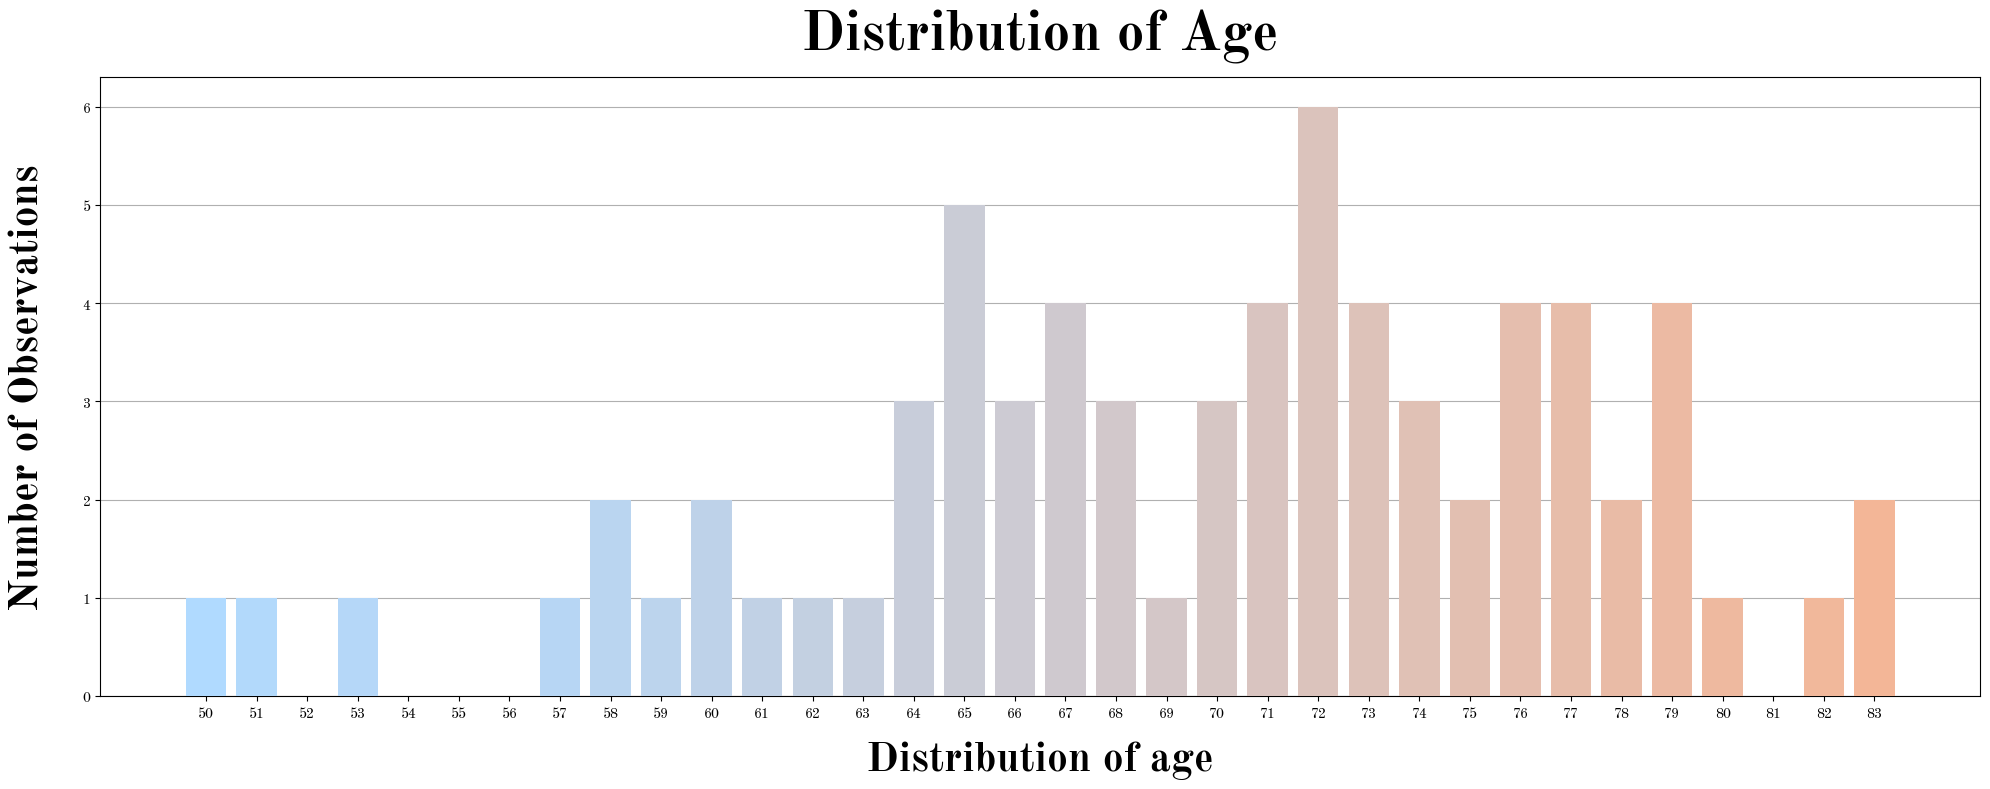

In [45]:
from Utils.plot_functions import get_color_gradient
import numpy as np
category = 'age' #['age', 'education_years', 'apoe4']
label = 'Distribution of age' #['Age', 'Education Years', 'APOE4']
figure_size = (20, 8)


first_entry_per_rid = merge.sort_values(['RID','M']).groupby(['RID']).first().reset_index()
# print(first_entry_per_rid.columns)
# first_entry_per_rid = df[df['M']==0].dropna(subset=['DX'])
count = first_entry_per_rid[category].value_counts().sort_index()
AGE_tick = np.arange(min(count.index), max(count.index)+1)

plt.figure(figsize=figure_size)
bars = plt.bar(count.index, count.values, color=get_color_gradient(my_colors[0], my_colors[1], len(AGE_tick)), zorder=3)

plt.title('Distribution of Age', fontproperties=prop_bold, pad=20, fontsize=40)
plt.xlabel(label, fontsize=30, fontproperties=prop_bold, labelpad=15)
plt.ylabel('Number of Observations', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks(range(min(count.index), max(count.index)+1), fontsize=24,  fontproperties=prop_regular)
plt.yticks(fontsize=24,  fontproperties=prop_regular)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('figures/MVAS/Age.pdf')
plt.show()

7 20


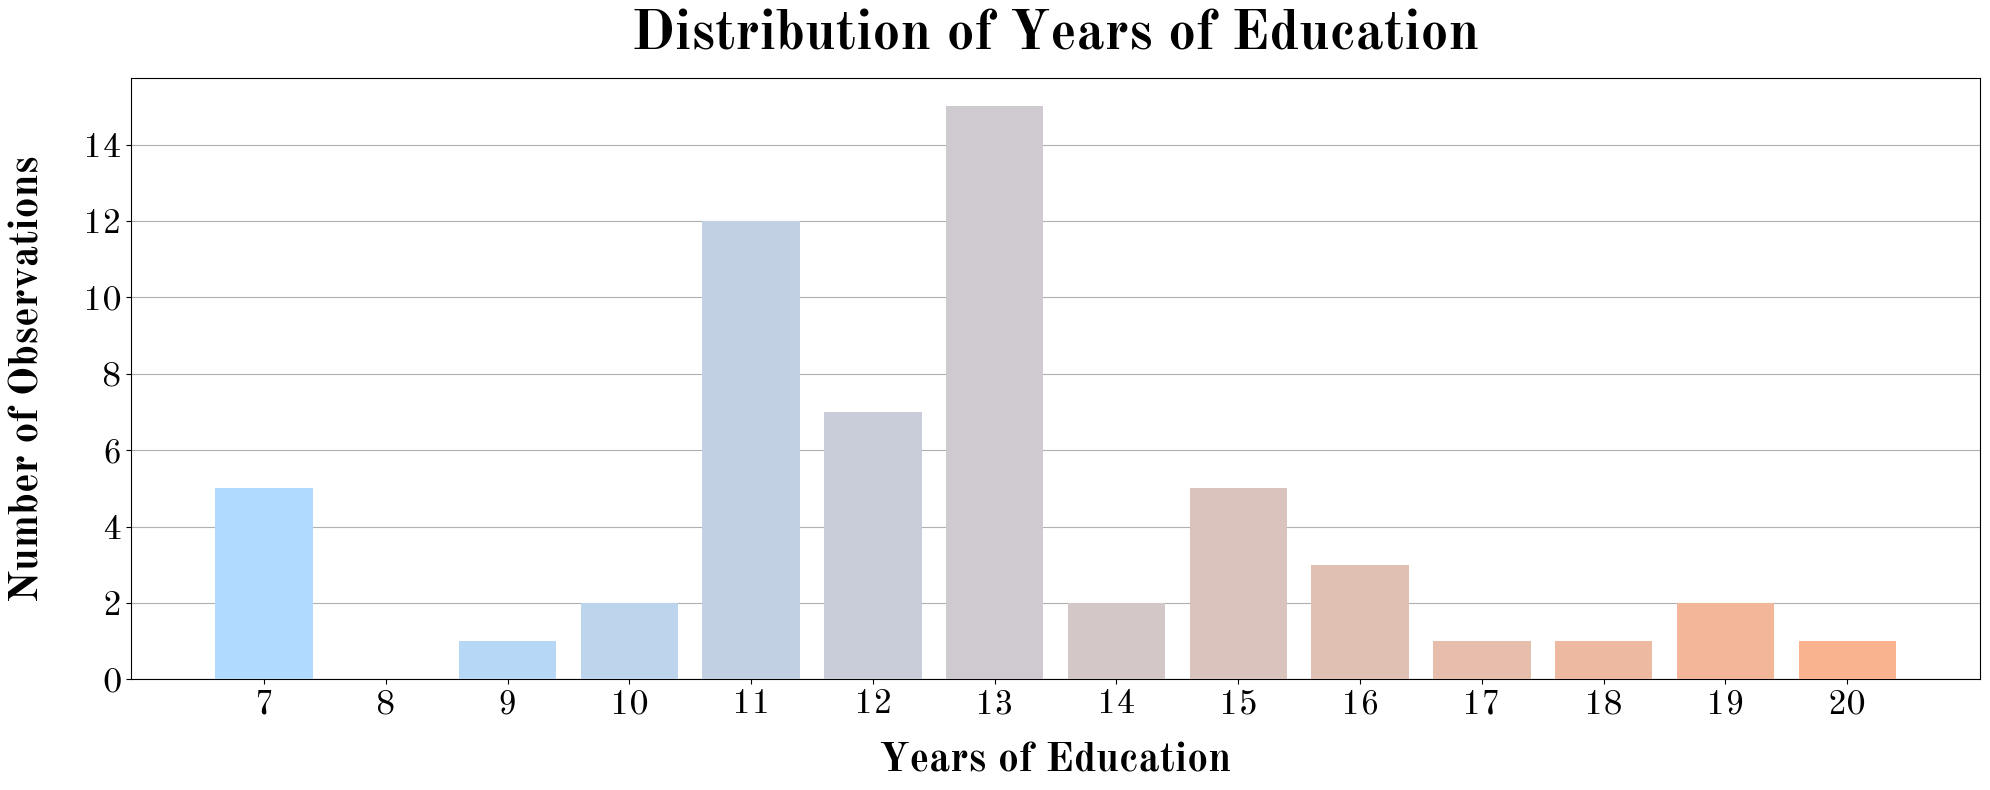

In [61]:
from Utils.plot_functions import get_color_gradient
import numpy as np
category = 'education_years' #['age', 'education_years', 'apoe4']
title = 'Distribution of Years of Education' #['Age', 'Education Years', 'APOE4']
label = 'Years of Education' #['Age', 'Education Years', 'APOE4']

figure_size = (20, 8)


first_entry_per_rid = df_event.sort_values(['RID','M']).groupby(['RID']).first().reset_index()
# print(first_entry_per_rid.columns)
# first_entry_per_rid = df[df['M']==0].dropna(subset=['DX'])
count = first_entry_per_rid[category].value_counts().sort_index()
AGE_tick = np.arange(min(count.index), max(count.index)+1)

plt.figure(figsize=figure_size)
bars = plt.bar(count.index, count.values, color=get_color_gradient(my_colors[0], my_colors[1], len(AGE_tick)), zorder=3)
print(int(min(count.index)), int(max(count.index)))
plt.title(title, fontproperties=prop_bold, pad=20, fontsize=40)
plt.xlabel(label, fontsize=30, fontproperties=prop_bold, labelpad=15)
plt.ylabel('Number of Observations', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks(range(int(min(count.index)), int(max(count.index))+1),  fontproperties=prop_regular, fontsize=24)
plt.yticks(fontproperties=prop_regular,fontsize=24)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('figures/MVAS/education.pdf')
plt.show()

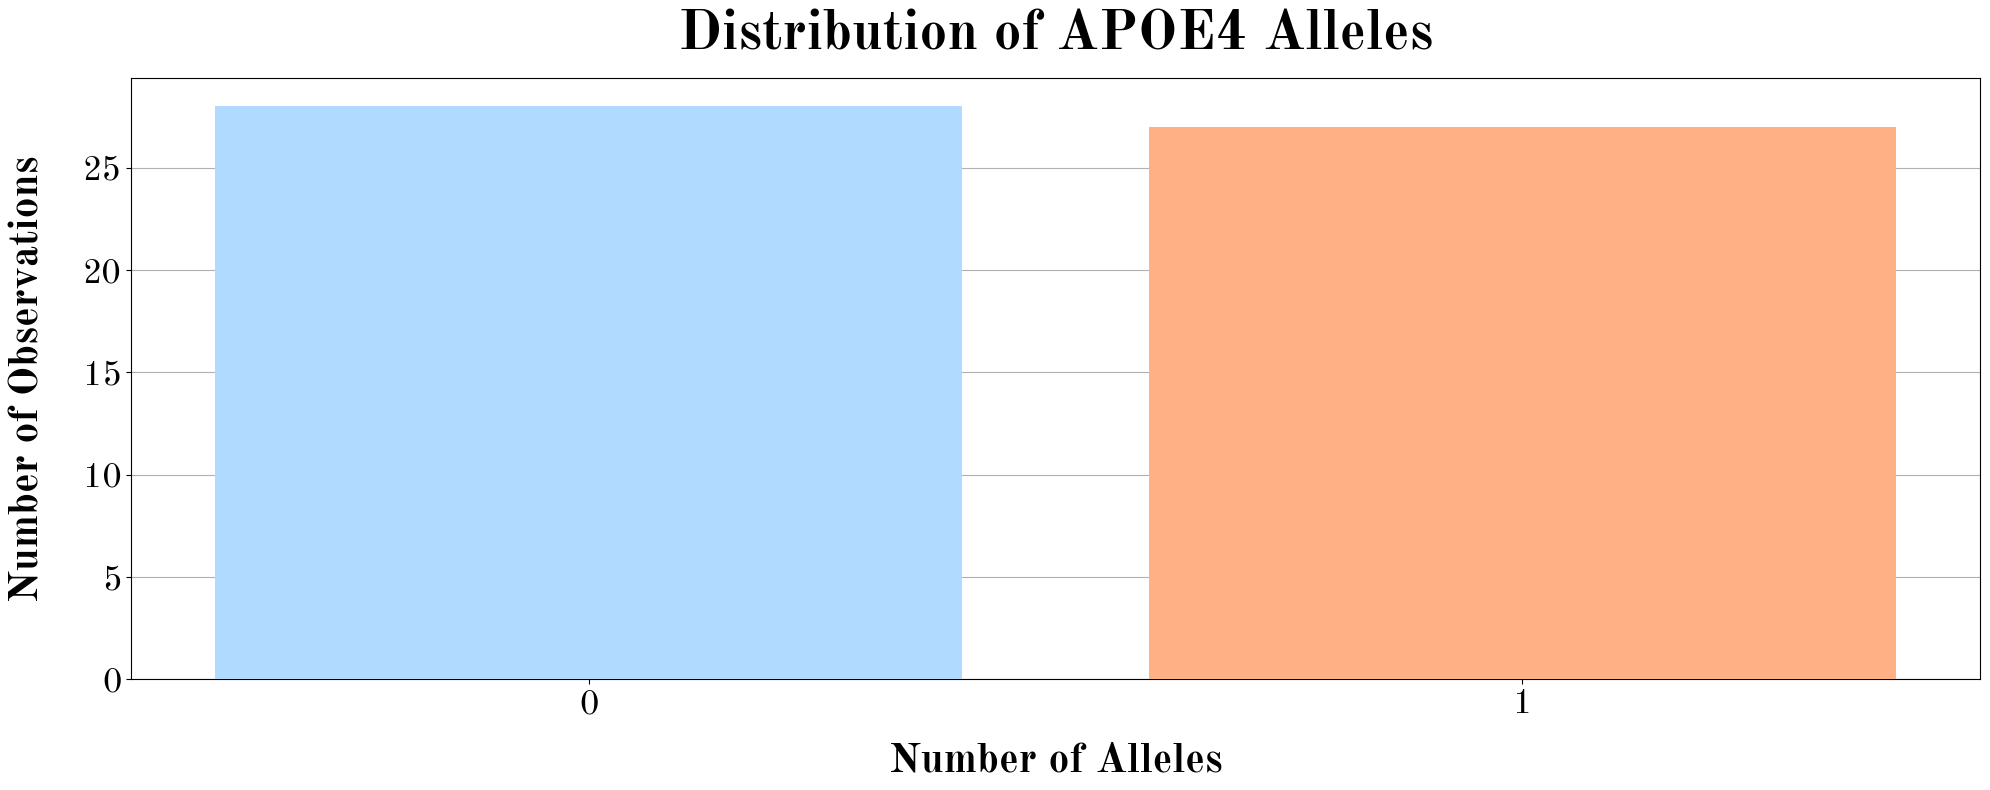

In [60]:
from Utils.plot_functions import get_color_gradient
import numpy as np
category = 'apoe4' #['age', 'education_years', 'apoe4']
title = 'Distribution of APOE4 Alleles' #['Age', 'Education Years', 'APOE4']
label = 'Number of Alleles' #['Age', 'Education Years', 'APOE4']

figure_size = (20, 8)


first_entry_per_rid = df_event.sort_values(['RID','M']).groupby(['RID']).first().reset_index()
# print(first_entry_per_rid.columns)
# first_entry_per_rid = df[df['M']==0].dropna(subset=['DX'])
count = first_entry_per_rid[category].value_counts().sort_index()
AGE_tick = np.arange(min(count.index), max(count.index)+1)

plt.figure(figsize=figure_size)
bars = plt.bar(count.index, count.values, color=get_color_gradient(my_colors[0], my_colors[1], len(AGE_tick)), zorder=3)

plt.title(title, fontproperties=prop_bold, pad=20, fontsize=40)
plt.xlabel(label, fontsize=30, fontproperties=prop_bold, labelpad=15)
plt.ylabel('Number of Observations', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks([0,1],  fontproperties=prop_regular, fontsize=24)
plt.yticks(fontproperties=prop_regular, fontsize=24)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('figures/MVAS/apoe4.pdf')
plt.show()